<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./25_ltpy_Sentinel3_OLCI_L1.ipynb"><< 25 - Sentinel-3 OLCI Level 1 data</a><span style="float:right;"><a href="./32_ltpy_AC_SAF_GOME-2_L3_case_study.ipynb">32 - AC SAF - GOME-2 - Level 3 - Workflow examples >></a>

# 3.1 AC SAF - GOME-2 - Level 2 - Case studies

AC SAF GOME-2 Level 2 and Copernicus  data are helpful to track and monitor inputs to the atmosphere from various trace gases.

We investigate two case studies:
* **[1) Case study - Amazonian fires and the spread of HCHO in August 2019](#amazon_fires)**
 * [1.1 - Load AC SAF GOME-2 Level 2 HCHO data for 19 and 22 August 2019](#amazon_fires_1)
 * [1.2 - Plot AC SAF GOME-2 Level 2 HCHO data - Mollweide projection](#amazon_fires_2)
 * [1.3 - Generate a geographical subset over South America and plot the subset](#amazon_fires_3)
 * [1.4 - Integrate with Sentinel-5P CO data](#amazon_fires_4)
 
 
* **[2) Case study - Canada / US fires in August 2018](#us_fires)**
 * [2.1 - Generate a geographical subset of a masked Metop-A and Metop-B combined dataset](#us_fires_1)
 * [2.2 - Plot the three geographical subsets in one row](#us_fires_2)
 * [2.3 - Integrate with Sentinel-5P CO data](#us_fires_3)

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [2]:
from ipynb.fs.full.ltpy_functions import load_l2_data_xr, load_masked_l2_da, visualize_gome_mollweide, generate_geographical_subset, generate_masked_array



<hr>

## <a id="amazon_fires"></a>1) Case study -  Amazonian fires and the spread of `HCHO` in August 2019

Satellite data show the large input to atmosphere due to Amazonian fires. GOME-2 is capable to measure the total amount of `Formaldehyde (HCHO)` over a specific pixel. Nevertheless, since `HCHO` is concentrated close to surface, due to its volatility and reactivity, these observations are indicatives of the location and intensity of the sources.

`HCHO` is a precursor (e.g. serves as basis for multiple reactions including ones producing tropospheric ozone) and is considered harmful due to its toxicity and volatility.
`HCHO` is produced both by synthesis and natural reactions. [Biomass burning](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/1999GL900156) is considered to be a significant organic source of `HCHO`.

Formaldehyde can be monitored from the GOME-2 instrument onboard Metop-B. Let's monitor Formaldehyde between 19 August and 22 August 2019.

### <a id="amazon_fires_1"></a>1) Load AC SAF GOME-2 Level 2 `HCHO` data for 19 and 22 August 2019

Define general variables that facilitate the loading of the data.

In [3]:
parameter='HCHO'

internal_filepath='TOTAL_COLUMNS'
latName = 'GEOLOCATION/LatitudeCentre'
lonName = 'GEOLOCATION/LongitudeCentre'

longname='Vertical column density of ' + parameter
unit='mol/cm2'
name='vertical_column_' + parameter
threshold = 0.3

latmin = -60
latmax = 15
lonmin = -80
lonmax = 40

Load masked `HCHO` data with the help of [load_masked_l2_da](./ltpy_functions.ipynb#load_masked_l2_da) function. Do it for the 19 August and subsequently for 22 August 2019.

In [22]:
def load_masked_l2_da(directory, file_format, internal_filepath, parameter, lat_path, lon_path, no_of_dims, paramname, longname, unit, threshold, operator):
    da = load_l2_data_xr(directory, file_format, internal_filepath, parameter, lat_path, lon_path, no_of_dims, paramname, longname, unit)
    cloud_fraction = load_l2_data_xr(directory, file_format, 'CLOUD_PROPERTIES', 'CloudFraction', lat_path, lon_path, no_of_dims, 'CloudFraction', unit='-', longname='Cloud Fraction')
    
    return generate_masked_array(da, cloud_fraction, threshold, operator, drop=False)
    
    
    

In [10]:
day1 = '19'
directory_2a= '../eodata/gome2/offline/2a/2019/08/'+day1+'/'
directory_2b= '../eodata/gome2/offline/2b/2019/08/'+day1+'/'

gome_2a_1 = load_masked_l2_da(directory_2a, 'hdf5', 'TOTAL_COLUMNS',
                                'HCHO', latName, lonName,
                                no_of_dims=1,
                                paramname='HCHO',
                                longname=longname,
                                unit=unit,
                                threshold=0.3,
                                operator='<')

gome_2b_1 = load_masked_l2_da(directory_2b, 'hdf5', 'TOTAL_COLUMNS',
                                'HCHO', latName, lonName,
                                no_of_dims=1,
                                paramname='HCHO',
                                longname=longname,
                                unit=unit,
                                threshold=0.3,
                                operator='<')

ab_da_masked_1 = xr.concat([gome_2a_1, gome_2b_1], dim='ground_pixel')
ab_da_masked_1

<xarray.DataArray (ground_pixel: 211583)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.70075 63.02299 ... -63.542446 -63.88441
    longitude  (ground_pixel) float32 66.6618 66.30891 ... 89.665565 89.45697
Dimensions without coordinates: ground_pixel
<xarray.DataArray (ground_pixel: 211217)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 63.129 63.42871 ... -67.79768 -68.14297
    longitude  (ground_pixel) float32 71.96646 71.51842 ... 82.346504 82.18982
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 422800)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.70075 63.02299 ... -67.79768 -68.14297
    longitude  (ground_pixel) float32 66.6618 66.30891 ... 82.346504 82.18982
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

In [11]:
day2 = '22'
directory_2a= '../eodata/gome2/offline/2a/2019/08/'+day2+'/'
directory_2b= '../eodata/gome2/offline/2b/2019/08/'+day2+'/'


gome_2a_2 = load_masked_l2_da(directory_2a, 'hdf5', 'TOTAL_COLUMNS',
                                'HCHO', latName, lonName,
                                no_of_dims=1,
                                paramname='HCHO',
                                longname=longname,
                                unit=unit,
                                threshold=0.3,
                                operator='<')
gome_2b_2 = load_masked_l2_da(directory_2b, 'hdf5', 'TOTAL_COLUMNS',
                                'HCHO', latName, lonName,
                                no_of_dims=1,
                                paramname='HCHO',
                                longname=longname,
                                unit=unit,
                                threshold=0.3,
                                operator='<')

ab_da_masked_2 = xr.concat([gome_2a_2, gome_2b_2], dim='ground_pixel')
ab_da_masked_2

<xarray.DataArray (ground_pixel: 211561)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 64.01711 64.33602 ... -64.7555 -65.09657
    longitude  (ground_pixel) float32 339.44626 339.062 ... 104.566475 104.34174
Dimensions without coordinates: ground_pixel
<xarray.DataArray (ground_pixel: 226425)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 64.41016 64.703636 ... -69.34341
    longitude  (ground_pixel) float32 293.69965 293.20984 ... 122.62867
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 437986)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 64.01711 64.33602 ... -68.999374 -69.34341
    longitude  (ground_pixel) float32 339.44626 339.062 ... 122.812416 122.62867
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

### <a id="amazon_fires_2"></a>2) Plot AC SAF GOME-2 Level 2 `HCHO` data - Mollweide projection

Let's plot `HCHO` data for 19 August 2019. You see elevated `HCHO` values in East Brazil, over the region where the Amazonas fires occured.

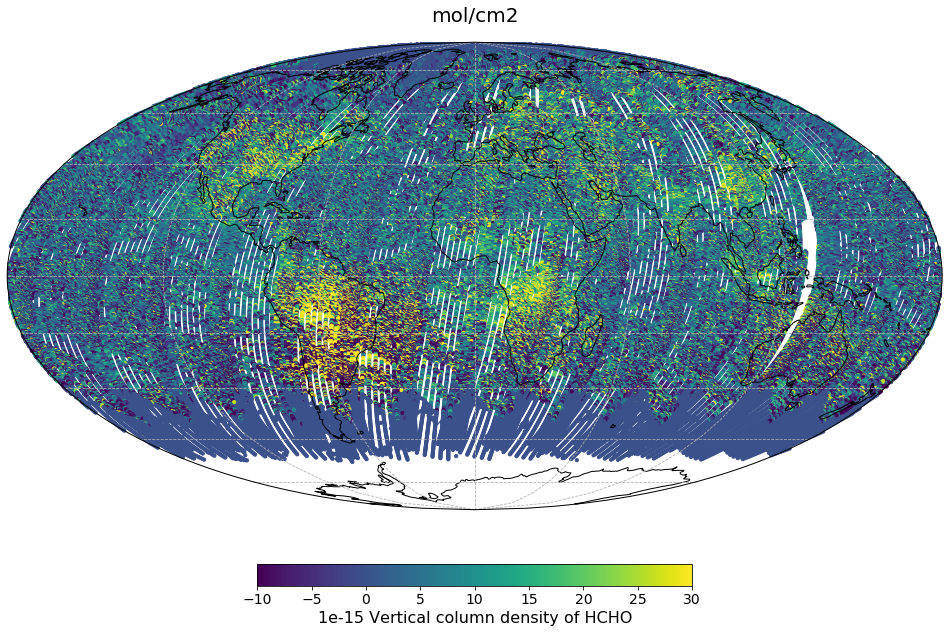

In [12]:
visualize_gome_mollweide(ab_da_masked_1, 1e-15, 'viridis', 10, -10, 30)

<br>

### <a id="amazon_fires_3"></a>3) Generate a geographical subset over South America and plot the subset

Generate a geographical subset for 19 August 2019, with the help of the [generate_geographical_subset](./ltpy_functions.ipynb#generate_geographical_subset) function.

In [13]:
ab_da_subset_1 = generate_geographical_subset(ab_da_masked_1, latmin, latmax, lonmin, lonmax)
ab_da_subset_1

<xarray.DataArray (ground_pixel: 63717)>
array([-1.5301598e+14,  1.4263173e+16, -6.3617947e+15, ...,
                  nan,            nan,            nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 14.970355 14.786521 ... -59.82744
    longitude  (ground_pixel) float32 -65.50238 -64.79895 ... 13.370697
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

Generate a geographical subset for 22 August 2019.

In [14]:
ab_da_subset_2 = generate_geographical_subset(ab_da_masked_2, latmin, latmax, lonmin, lonmax)
ab_da_subset_2

<xarray.DataArray (ground_pixel: 64395)>
array([-1.0205347e+16,  7.2194932e+15,  2.6061848e+15, ...,
                  nan, -1.0000000e+00, -1.0000000e+00], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 14.920257 14.735341 ... -58.314564
    longitude  (ground_pixel) float32 -24.51001 -23.801758 ... -1.9052124
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

Set some global variables that facilitate plotting and then plot both days next to each other.

In [15]:
day1 = '20190819'
day2 = '20190822'
conversion_factor = 1e-15
color_scale = 'viridis'
vmin = 0
vmax = 25

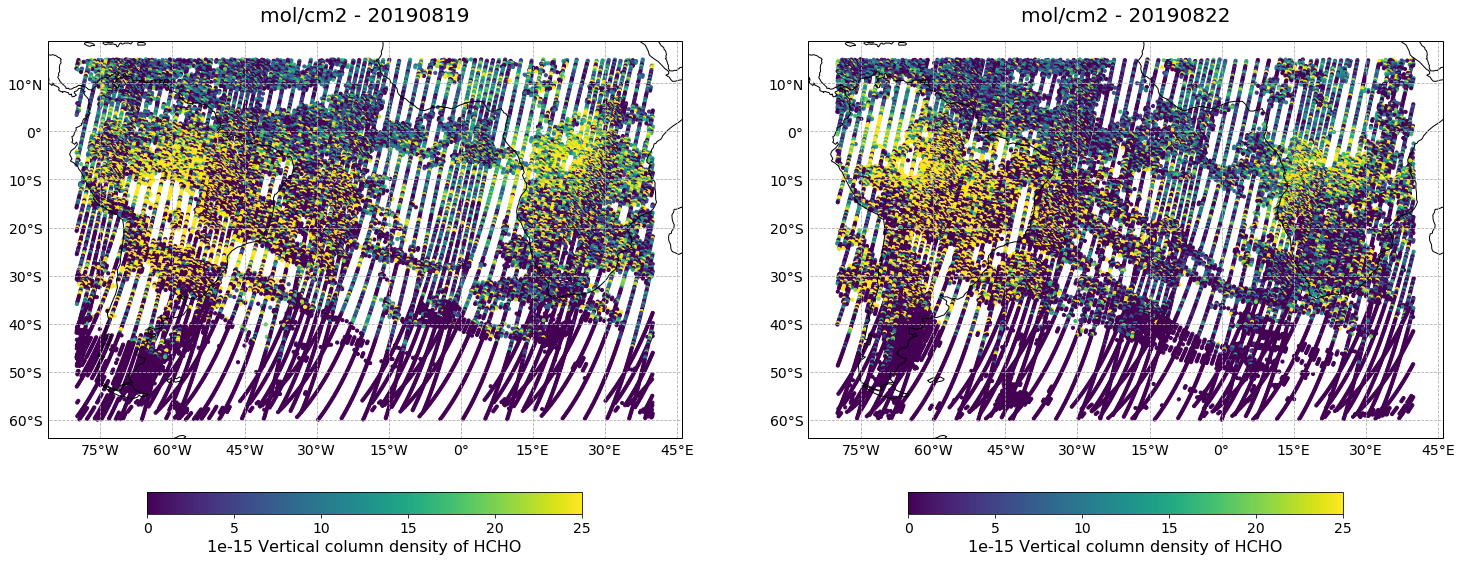

In [16]:
fig = plt.figure(figsize=(25,10))

#################################
# First subplot
#################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img1 = ax1.scatter(
    ab_da_subset_1.longitude.data,
    ab_da_subset_1.latitude.data,
    c=ab_da_subset_1.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=10,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + ab_da_subset_1.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(ab_da_subset_1.long_name + ' - ' + day1, fontsize=20, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img2 = ax2.scatter(
    ab_da_subset_2.longitude.data,
    ab_da_subset_2.latitude.data,
    c=ab_da_subset_2.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=10,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + ab_da_subset_2.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(ab_da_subset_2.long_name + ' - ' + day2, fontsize=20, pad=20.0)

plt.show()

<br>

<br>

### 4) <a id="amazon_fires_4"></a>Integrate with Sentinel-5P `CO` data

Load `Sentinel-5P CO` data for 19 and 22 August 2019 and plot both data sets next to each other.

In [17]:
s5p_mf_19 = xr.open_mfdataset('../eodata/sentinel5p/co/2019/08/19/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_19

co_19 = s5p_mf_19.carbonmonoxide_total_column[0,:,:]
lat_19 = co_19.latitude
lon_19 = co_19.longitude

In [18]:
s5p_mf_22 = xr.open_mfdataset('../eodata/sentinel5p/co/2019/08/22/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_22

co_22 = s5p_mf_22.carbonmonoxide_total_column[0,:,:]

lat_22 = co_22.latitude
lon_22 = co_22.longitude

<br>

Plot both `DataArrays` in one row, with `subplot`.

In [19]:
lonmin=-100
lonmax=0
latmin=-80
latmax=40

color_scale = 'jet'
vmin=0.01
vmax=1

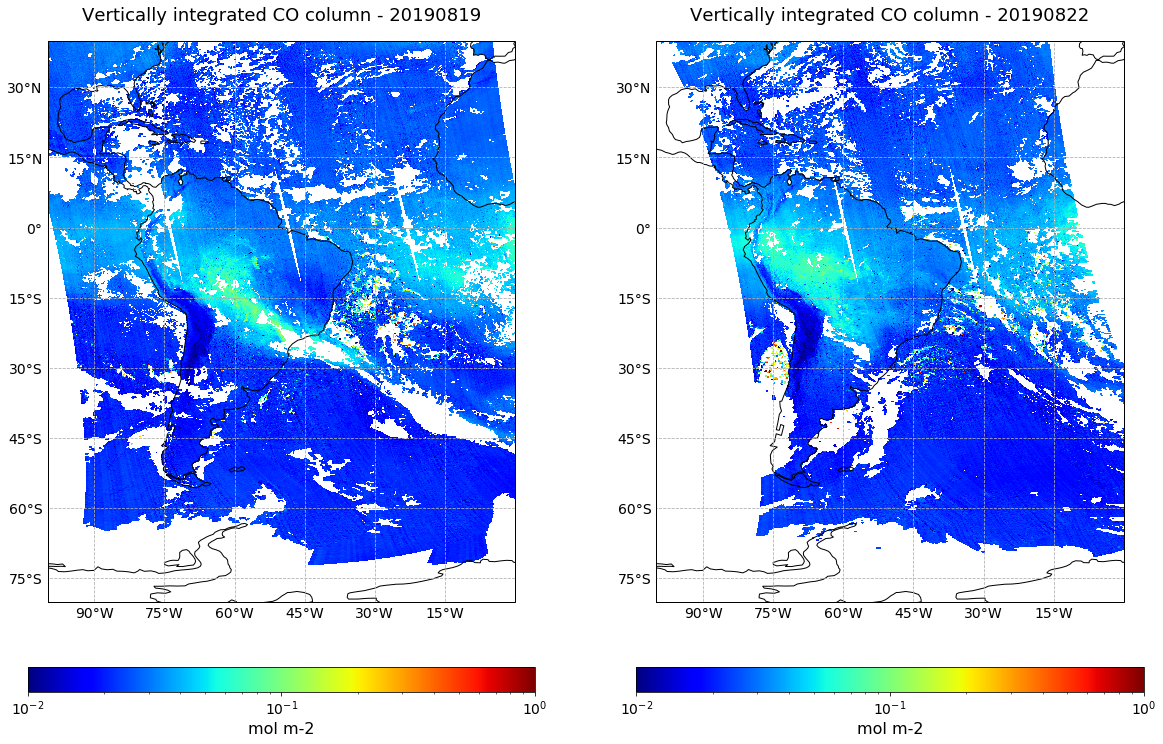

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs

fig=plt.figure(figsize=(20, 12))

################################
# Start of first subplot
################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img1 = plt.pcolormesh(lon_19, lat_19, np.squeeze(co_19.data), norm=LogNorm(), cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax)
ax1.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(co_19.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(co_19.long_name + ' - ' + day1, fontsize=18, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img2 = plt.pcolormesh(lon_22, lat_22, np.squeeze(co_22.data), norm=LogNorm(), cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
ax2.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(co_22.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(co_22.long_name + ' - ' + day2, fontsize=18, pad=20.0)

plt.show()

<br>

<br>

## <a id="us_fires"></a>2) Case study - Canada / US fires in August 2018

Between August 13-18 2018, smoke from wildfires in western US and Canada moved across the CONUS and reached the eastern US, including New England, on Aug 16-17 2018. Particulate Matter 2.5 e.g. increased to Code Yellow (Moderate) due to the smoke (much higher than normal).

Let's load AC SAF Level 2 `HCHO` data for three days (13, 16 and 18 August 2018) and compare the signal.

#### Define some general variables.

In [21]:
day1 = '20180813'
day2 = '20180816'
day3 = '20180818'

latmin=20
latmax=70
lonmin=-160
lonmax=-50

parameter='HCHO'
conversion_factor = 1e-15
color_scale='viridis'

longname='Vertical column density of ' + parameter
unit='mol/cm2'
name='vertical_column_ ' + parameter

vmin=0
vmax=20

<br>

### <a id="us_fires_1"></a>1) Generate a geographical subset of a masked Metop-A and Metop-B combined dataset

Load the data for the three days. For each day, we combine Metop-A and Metop-B data, mask them and generate a geographical subset that covers Canada and US.

In [25]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/13/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/13/'

latName='GEOLOCATION/LatitudeCentre'
lonName='GEOLOCATION/LongitudeCentre'

no2_2b_13 = load_masked_l2_da(directory_2b, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              no_of_dims=1, paramname=name, longname=longname, unit=unit, threshold=0.3, 
                              operator='<')
no2_2a_13 = load_masked_l2_da(directory_2a, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              longname=longname, paramname=name, no_of_dims=1, unit=unit, threshold=0.3, 
                              operator='<')
no2_ab_concat_13 =  xr.concat([no2_2b_13, no2_2a_13], dim='ground_pixel')

no2_ab_13_subset = generate_geographical_subset(no2_ab_concat_13, latmin,latmax,lonmin,lonmax)
no2_ab_13_subset

<xarray.DataArray (ground_pixel: 222827)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 61.31543 61.622986 ... -65.748146 -66.0936
    longitude  (ground_pixel) float32 313.97244 313.5758 ... 13.415427 13.27092
Dimensions without coordinates: ground_pixel
<xarray.DataArray (ground_pixel: 209831)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.605938 62.928234 ... -63.457127
    longitude  (ground_pixel) float32 307.2463 306.89435 ... 71.78254 71.577576
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 43189)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 63.489628 63.775143 ... 69.991516 69.98478
    longitude  (ground_pixel) float32 -52.964783 -53.463318 ... -124.68158
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

In [26]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/16/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/16/'

no2_2b_16 = load_masked_l2_da(directory_2b, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              no_of_dims=1, paramname=name, longname=longname, unit=unit, threshold=0.3, 
                              operator='<')
no2_2a_16 = load_masked_l2_da(directory_2a, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              longname=longname, paramname=name, no_of_dims=1, unit=unit, threshold=0.3, 
                              operator='<')

no2_ab_concat_16 =  xr.concat([no2_2b_16, no2_2a_16], dim='ground_pixel')

no2_ab_16_subset = generate_geographical_subset(no2_ab_concat_16, latmin,latmax,lonmin,lonmax)
no2_ab_16_subset

<xarray.DataArray (ground_pixel: 211333)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.45659 62.760635 ... -67.09328
    longitude  (ground_pixel) float32 302.86298 302.43924 ... 54.08259 53.930058
Dimensions without coordinates: ground_pixel
<xarray.DataArray (ground_pixel: 221171)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 63.672005 63.990925 ... -64.57928
    longitude  (ground_pixel) float32 63.13778 62.758045 ... 10.791004 10.571769
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 41324)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.45659 62.760635 ... 69.58582 69.92546
    longitude  (ground_pixel) float32 -57.137024 -57.56076 ... -159.00793
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

In [27]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/18/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/18/'

no2_2b_18 = load_masked_l2_da(directory_2b, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              no_of_dims=1, paramname=name, longname=longname, unit=unit, threshold=0.3, 
                              operator='<')
no2_2a_18 = load_masked_l2_da(directory_2a, 'hdf5', 'TOTAL_COLUMNS', parameter, latName, lonName, 
                              longname=longname, paramname=name, no_of_dims=1, unit=unit, threshold=0.3, 
                              operator='<')

no2_ab_concat_18 =  xr.concat([no2_2b_18, no2_2a_18], dim='ground_pixel')

no2_ab_18_subset = generate_geographical_subset(no2_ab_concat_18, latmin,latmax,lonmin,lonmax)
no2_ab_18_subset

<xarray.DataArray (ground_pixel: 211306)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 63.02229 63.32194 ... -67.34712 -67.692116
    longitude  (ground_pixel) float32 53.869133 53.42233 ... 114.814415
Dimensions without coordinates: ground_pixel
<xarray.DataArray (ground_pixel: 211704)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 64.36143 64.678276 ... -65.46326
    longitude  (ground_pixel) float32 306.0967 305.6985 ... 46.046204 45.81461
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 41859)>
array([         nan, 5.290529e+15,          nan, ...,          nan,
                nan,          nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 69.85023 69.82095 ... 69.96861 69.95663
    longitude  (ground_pixel) float32 -51.062744 -52.1427 ... -149.0791
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  mol/cm2
    units:      Vertical column density of HCHO

<br>

### <a id="us_fires_2"></a>2) Plot the three geographical subsets in one row

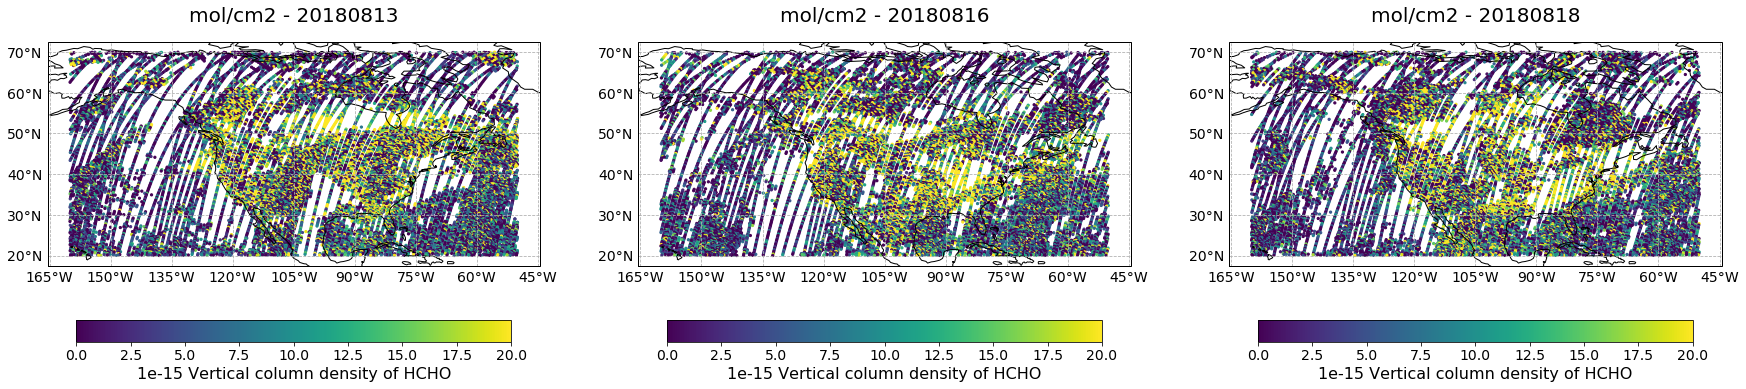

In [28]:
fig = plt.figure(figsize=(30,10))

#################################
# First subplot
##################################
ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree())
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img1 = ax1.scatter(
    no2_ab_13_subset.longitude.data,
    no2_ab_13_subset.latitude.data,
    c=no2_ab_13_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + no2_ab_13_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(no2_ab_13_subset.long_name + ' - ' + day1, fontsize=20, pad=20.0)

#################################
# Second subplot
##################################
ax2 = plt.subplot(1,3,2, projection=ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img2 = ax2.scatter(
    no2_ab_16_subset.longitude.data,
    no2_ab_16_subset.latitude.data,
    c=no2_ab_16_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + no2_ab_16_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(no2_ab_16_subset.long_name + ' - ' + day2, fontsize=20, pad=20.0)

#################################
# Third subplot
##################################
ax3 = plt.subplot(1,3,3, projection=ccrs.PlateCarree())
ax3.coastlines()

gl = ax3.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img3 = ax3.scatter(
    no2_ab_18_subset.longitude.data,
    no2_ab_18_subset.latitude.data,
    c=no2_ab_18_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img3, ax=ax3, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + no2_ab_18_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax3.set_title(no2_ab_18_subset.long_name + ' - ' + day3, fontsize=20, pad=20.0)

plt.show()

<br>

### 3) <a id='us_fires_3'></a>Integrate with Sentinel-5P `CO` data

Load `Sentinel-5P CO` data for 13 and 18 August 2018 and plot both data sets next to each other.

In [29]:
s5p_mf_13 = xr.open_mfdataset('../eodata/sentinel5p/co/2018/08/13/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_13

co_13 = s5p_mf_13.carbonmonoxide_total_column[0,:,:]
lat_13 = co_13.latitude
lon_13 = co_13.longitude

In [30]:
s5p_mf_16 = xr.open_mfdataset('../eodata/sentinel5p/co/2018/08/16/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_16

co_16 = s5p_mf_16.carbonmonoxide_total_column[0,:,:]
lat_16 = co_16.latitude
lon_16 = co_16.longitude

<br>

Plot both `DataArrays` in one row, with `subplot`.

In [31]:
color_scale = 'jet'
vmin=0.01
vmax=1

latmin=20
latmax=70
lonmin=-160
lonmax=-50

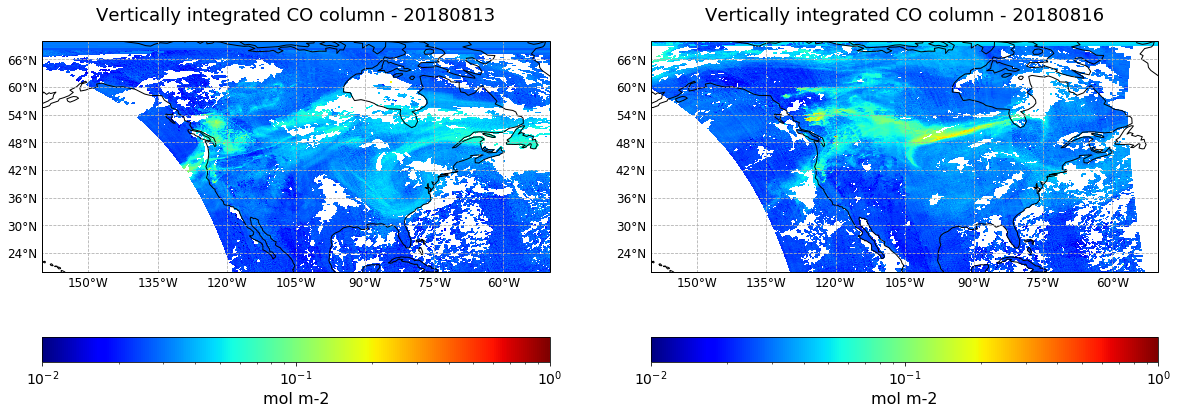

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs

fig=plt.figure(figsize=(20, 12))

################################
# Start of first subplot
################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img1 = plt.pcolormesh(lon_13, lat_13, np.squeeze(co_13.data), norm=LogNorm(), cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
ax1.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}

cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(co_13.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(co_13.long_name + ' - ' + day1, fontsize=18, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img2 = plt.pcolormesh(lon_16, lat_16, np.squeeze(co_16.data), norm=LogNorm(), cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax)
ax2.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}

cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(co_16.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(co_16.long_name + ' - ' + day2, fontsize=18, pad=20.0)

plt.show()

<br>

<a href="./25_ltpy_Sentinel3_OLCI_L1.ipynb"><< 25 - Sentinel-3 OLCI Level 1 data</a><span style="float:right;"><a href="./32_ltpy_AC_SAF_GOME-2_L3_case_study.ipynb">32 - AC SAF - GOME-2 - Level 3 - Workflow examples >></a>

<hr>

<p><img src='./img/copernicius_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>